In [1]:
#####################################
#Econs 514 -- Assignment 3 - Rust (1987) Repl
#Due - 5/5/2023
#By -- Suhina Deol
#####################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fixed_point
from numba import njit, float64, float32, int64, prange
from numba.experimental import jitclass
from datetime import datetime
from tabulate import tabulate

In [2]:
b_raw = pd.read_csv(r'C:\Users\suhin\iCloudDrive\Documents\Econs 514 (Metrics IV)\Ass 3\bus1234.csv')
#count, id, group, year, month, replace, mile

b = pd.DataFrame(b_raw)
b.rename(columns = {'Unnamed: 0':'count'}, inplace = True)

b.describe()

,count,id,group,year,month,replace,miles
count,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000
mean,4129.500000,99.454722,278350.605932,1981.080387,6.489831,0.007264,118235.158232
std,2384.600945,27.511206,265015.917102,2.617909,3.489873,0.084924,85129.344989
min,0.000000,59.000000,50.000000,1975.000000,1.000000,0.000000,0.000000
25%,2064.750000,76.000000,203.000000,1979.000000,3.000000,0.000000,46096.000000
50%,4129.500000,94.000000,530875.000000,1981.000000,6.000000,0.000000,101118.000000
75%,6194.250000,122.000000,530875.000000,1983.000000,10.000000,0.000000,179969.000000
max,8259.000000,162.000000,530875.000000,1985.000000,12.000000,1.000000,388254.000000


In [3]:
b = pd.DataFrame(b_raw)
b = b[['id','group','year','month','replace','miles']]
b["day"] = 1

new_cols = ['id','group','year','month','day', 'replace', "miles" ]

b=b.reindex(columns=new_cols)

b =  b.astype({'year':'str'})
b =  b.astype({'month':'str'})
b =  b.astype({'day':'str'})

#b["date"] = b["year"].apply(str) + "/" + b["month"].apply(str) + "/" + b["day"].apply(str)
b["date"] = b["year"] + b["month"]

#b["date"] = pd.to_datetime(b["date"])

print(type('date'))

<class 'str'>


In [4]:
new_cols = ['date','id', "miles" ]
oldcols=b.reindex(columns=new_cols)
oldcols = pd.DataFrame(oldcols)

print(oldcols)

       date   id   miles
0     19815  144    2208
1     19816  144    5418
2     19817  144    8547
3     19818  144   11566
4     19819  144   15890
...     ...  ...     ...
8255  19851   95  342004
8256  19852   95  343654
8257  19853   95  345631
8258  19854   95  347549
8259  19855   95  347549

[8260 rows x 3 columns]


In [5]:
# The columns of the new data frame will be the values in col2 of the original
a = pd.DataFrame(oldcols)

# The columns of the new data frame will be the values in col2 of the original
newcols = list(set(oldcols['id']))
rows = list(set(oldcols['date']))

# Create the new data matrix
data = np.zeros((len(rows), len(newcols)))

# Iterate over each row and fill in the new matrix
for row in zip(a['date'], a['id'], a['miles']):
    rowindex = rows.index(row[0])
    colindex = newcols.index(row[1])
    data[rowindex][colindex] = row[2]

newf = pd.DataFrame(data)
newf.columns = newcols
newf.index = rows

print(newf)

#newf.describe()

             59        60        61        62        63        64        65   \
19813    58332.0  224753.0   43578.0   26243.0   77980.0  123849.0  273871.0   
19786   118615.0  142429.0  164203.0  147696.0  144219.0   13879.0  170733.0   
19818    70850.0  236619.0   47515.0   41155.0   88922.0  136702.0  283494.0   
198211  101508.0  268085.0   80361.0   86664.0  120004.0  167959.0   34829.0   
19808    41726.0  208989.0   26527.0  219181.0   61976.0  105815.0  255337.0   
...          ...       ...       ...       ...       ...       ...       ...   
197511   10479.0    9064.0   12892.0   10924.0    7665.0   11997.0   12380.0   
19776    84579.0   95928.0  104535.0   93889.0   92433.0   97651.0  107792.0   
19772    74323.0   79929.0   89044.0   79567.0   74329.0   81364.0   90309.0   
19783   110597.0  130014.0  147314.0  133632.0  131339.0      86.0  153719.0   
19765    37631.0   37003.0   44432.0   41134.0   29658.0   41101.0   46165.0   

             66        67        68   .

In [6]:
newf['index'] = newf.index

In [7]:
#newf.sort_values(by=['index'])
newf['sort'] = newf['index'].str.extract('(\d+)', expand=False).astype(int)
newf.sort_values('sort',inplace=True, ascending=True)
newf = newf.drop('sort', axis=1)
newf = newf.drop('index', axis=1)

print(newf)

             59        60        61        62        63        64       65   \
19759     2353.0     129.0    3246.0     532.0    1667.0    1758.0   2486.0   
19761    20326.0   18251.0   23993.0   21457.0   15095.0   21575.0  23211.0   
19762    24898.0   22725.0   29378.0   26568.0   18735.0   26537.0  29290.0   
19763    29349.0   27843.0   33604.0   29790.0   22240.0   31036.0  33696.0   
19764    33304.0   32508.0   39581.0   35774.0   25886.0   36239.0  39938.0   
...          ...       ...       ...       ...       ...       ...      ...   
198311  123511.0  292192.0  107623.0  111630.0  148163.0  191825.0  61291.0   
198312  125254.0  293846.0  109722.0  113447.0  149325.0  193620.0  62965.0   
198410  144557.0  312719.0  124500.0  135557.0  171245.0  212256.0  83251.0   
198411  146465.0  315040.0  126422.0  137565.0  173234.0  214149.0  85887.0   
198412  148396.0  316984.0  128500.0  139530.0  174745.0  215173.0  87897.0   

            66       67        68   ...      153   

In [8]:
# Calculate the states d = {0, 1, 2}
newf.replace(0, np.nan, inplace=True)
b_state = newf - newf.shift(1)

b_state[b_state <5000] = 0
b_state[b_state >9999] = 2
b_state[b_state>2] = 1

print(b_state)

b_state.describe()


        59   60   61   62   63   64   65   66   67   68   ...  153  154  155  \
19759   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
19761   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  NaN  NaN  NaN   
19762   0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  NaN  NaN  NaN   
19763   0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  NaN  NaN  NaN   
19764   0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  ...  NaN  NaN  NaN   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
198311  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
198312  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
198410  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  2.0  2.0   
198411  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
198412  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

        156  157  158  159  160  161  1

,59,60,61,62,63,64,65,66,67,68,...,153,154,155,156,157,158,159,160,161,162
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,114.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000
mean,0.293103,0.310345,0.353448,0.318966,0.310345,0.318966,0.396552,0.387931,0.491379,0.500000,...,0.347826,0.695652,0.521739,0.565217,0.434783,0.478261,0.26087,0.608696,0.391304,0.304348
std,0.659608,0.664815,0.675719,0.667235,0.651604,0.680142,0.696317,0.694970,0.716218,0.731709,...,0.647281,0.702902,0.730477,0.727767,0.727767,0.730477,0.68870,0.722315,0.722315,0.702902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.500000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000


In [9]:
N = b_state.notna().sum().sum()
p = (b_state == 0).sum().sum() / N
q = (b_state == 1).sum().sum() / N
(p, q)


(0.7538994800693241, 0.11413716266402575)

In [10]:
#Now you got that, go back and do b

In [11]:
def discretize(miles, d=5000):
    '''Discretizes odometer data into buckets of length d'''
    return np.floor(miles / d)

In [12]:
b['mileage']= b['miles'].apply(discretize)

In [13]:
b.rename(columns = {'mileage':'state'}, inplace = True)
b.rename(columns = {'replace':'decision'}, inplace = True)

new_cols = ['id', 'date', 'state', 'decision']
b=b.reindex(columns=new_cols)

b.head()

,id,date,state,decision
0,144,19815,0.0,0
1,144,19816,1.0,0
2,144,19817,1.0,0
3,144,19818,2.0,0
4,144,19819,3.0,0


In [15]:
spec = [('β', float64),
        ('θ_1', float64),
        ('RC', float64),
        ('T', int64),
        ('p', float64),
        ('q', float64),
        ('scale', float64),
        ('P', float64[:, :]),
        ('x', float64[:])]

@jitclass(spec)
class Rust(object):

    def __init__(self, β=0.9999, θ_1=3.6, 
                 RC=10, T=90, p=0.3497, 
                 q=0.6387, scale=0.001):
        self.β = β
        self.θ_1 = θ_1
        self.RC = RC
        self.T = T
        self.p = p
        self.q = q
        self.scale = scale

        # Construct transition matrix
        P = np.zeros((T, T))
        np.fill_diagonal(P, p)
        P += np.diag(np.ones(T - 1) * q, 1)
        P += np.diag(np.ones(T - 2) * (1 - p - q), 2)
        P[:, -1] += 1 - P.sum(1)  # Adjust to sum to 1
        self.P = P

        # Statespace of x
        self.x = np.arange(T, dtype=np.float64)

In [16]:
@njit
def c(x, rust):
    '''Linear cost function'''

    scale = rust.scale
    θ_1 = rust.θ_1

    return scale * θ_1 * x

@njit
def u(x, i, rust):
    '''Utility function'''
    
    if i == 0:
        return -c(x, rust)

    if i == 1:
        return -c(x, rust) - rust.RC

In [17]:
@njit
def solve_EV(rust, tol=1e-3, maxiter=300000, print_flag=False):

    T = rust.T
    β = rust.β
    P = np.ascontiguousarray(rust.P)
    x = rust.x

    # Initial guess of value function
    EV = np.zeros(T)

    # Bellman operator
    def T(EV):
        wait = u(x, 0, rust) + β * EV
        replace = u(x[0], 1, rust) + β * EV[0]
        EV_new = np.exp(replace - EV) + np.exp(wait - EV)
        EV_new = P @ (np.log(EV_new) + EV)
        return EV_new

    # Find the fixed point of Bellman operator
    i = 0
    dist = 1e3
    for i in prange(maxiter):
        EV_new = T(EV)
        dist = np.linalg.norm(EV - EV_new)

        if dist < tol:
            if print_flag:
                print(f'Converged in {i} iterations')
            return EV
        else:
            i += 1
            EV = EV_new.copy()
    
    if print_flag:
        print('Reached max iterations')
        
    return EV

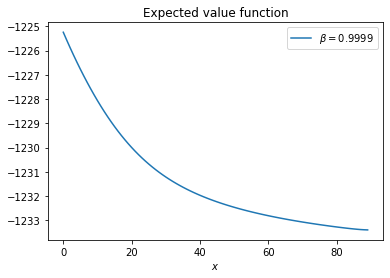

In [18]:
r = Rust(p=p, q=q)
EV_star = solve_EV(r)
plt.plot(r.x, EV_star, label=rf'$\beta = {r.β}$')

plt.title('Expected value function')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [19]:
b.head()

,id,date,state,decision
0,144,19815,0.0,0
1,144,19816,1.0,0
2,144,19817,1.0,0
3,144,19818,2.0,0
4,144,19819,3.0,0


In [20]:
@njit
def conditional_probability(rust):

    β = rust.β
    x = rust.x
    P = rust.P

    # Solve inner loop
    EV = solve_EV(rust)

    wait = u(x, 0, rust) + β * P @ EV
    replace = u(x[0], 1, rust) + β * EV[0]
    P_wait = 1 / (1 + np.exp(replace - wait))
    P_replace = 1 - P_wait
    
    return P_wait, P_replace

In [21]:
def log_likelihood(θ,             # Parameters to search over 
                   b_data,        # Data consists of states and decisions
                   p,             # Absorbing state probability
                   q):            # Transition state 1 probability

    # Guess of parameters
    θ_1, RC = θ

    # Set up model with guess
    r = Rust(θ_1=θ_1, RC=RC, p=p, q=q)

    # Solve inner loop and find choice
    # probabilities conditional on x and i
    P_wait, P_replace = conditional_probability(r)

    # Log likelihood is sum of conditional probabilities given observed data
    logL = 0
    for decision, state in zip(b.decision, b.state):
        state = int(state)

        # Wait
        if decision == 0:
            logL += np.log(P_wait[state])
        
        # Replace
        if decision == 1:
            logL += np.log(P_replace[state])

    return -logL

In [22]:
%%time
θ_star = minimize(log_likelihood, x0=(0.1, 10), args=(newf, p, q)).x

CPU times: total: 51 s
Wall time: 1min 13s


In [23]:
θ_star

#Get following output, so handcode x1 and x2 into next result
# success: False
#: by natasha  ----- array([ 2.61808055, 10.03904057])

array([ 2.13082394, 10.76908507])

In [26]:
# Use the solution to set up a new model, set lbound for theta_1at 0

r_star = Rust(p=p, q=q, θ_1=θ_star[0], RC=θ_star[1])
EV_star = solve_EV(r_star)

print (r_star)
print (EV_star)

[-986.68125775 -986.9424142  -987.19802054 -987.4480799  -987.69259645
 -987.93157565 -988.16502447 -988.39295162 -988.61536786 -988.83228633
 -989.04372283 -989.24969619 -989.45022868 -989.64534633 -989.83507934
 -990.01946244 -990.19853524 -990.37234259 -990.54093484 -990.7043681
 -990.86270443 -991.01601196 -991.16436494 -991.30784374 -991.44653468
 -991.58052991 -991.7099271  -991.83482908 -991.95534345 -992.07158209
 -992.18366061 -992.2916978  -992.39581503 -992.49613562 -992.59278421
 -992.6858862  -992.77556708 -992.86195196 -992.94516494 -993.02532872
 -993.10256408 -993.17698952 -993.24872093 -993.31787126 -993.38455032
 -993.44886453 -993.51091682 -993.57080648 -993.62862909 -993.68447649
 -993.73843677 -993.79059426 -993.84102959 -993.88981973 -993.93703806
 -993.98275442 -994.02703525 -994.06994364 -994.1115394  -994.1518792
 -994.19101663 -994.22900226 -994.26588373 -994.30170576 -994.33651025
 -994.37033623 -994.40321987 -994.43519439 -994.46629    -994.49653375
 -994.52

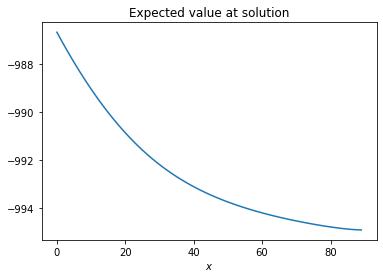

In [27]:
plt.plot(r_star.x, EV_star)
plt.title('Expected value at solution')
plt.xlabel('$x$')
plt.show()

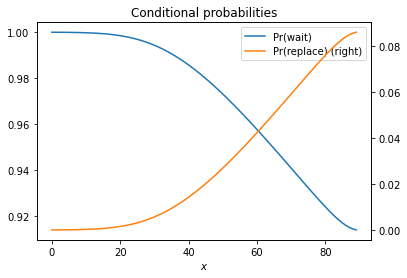

In [28]:
P_star = pd.DataFrame(conditional_probability(r_star)).T
P_star.iloc[:, 0].plot(label='Pr(wait)', legend=True, title='Conditional probabilities', xlabel='$x$')
P_star.iloc[:, 1].plot(secondary_y=True, label='Pr(replace)', legend=True)
plt.show()